In [1]:
import sys
sys.path.append("../src")

from utils.load_model import get_model

from my_model import get_ilsvrc2012

from torch.utils.data import DataLoader

from utils.imagenet1000_classname import imgnet_label_name
from utils.tensortracker import TensorTracker
from utils import plots

In [2]:
%matplotlib inline

In [3]:
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch.nn as nn

import svcca

In [4]:
from my_model import my_resnet

from glob import glob

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [5]:
from utils.receptive_field_tracker import RFTracker

from collections import OrderedDict

from utils.analysis import make_dir

In [6]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer3"

In [7]:
exts = ("png", "pdf")

In [8]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [9]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    print(path)
    data = np.load(path)
    print(data.shape)
    imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.0.add_func/other-images00000000.npy
(256, 3, 210, 210)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.1.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.2.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.3.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.4.add_func/other-images00000000.npy
(256, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer3.5.add_func/other-images00000000.npy
(256, 3, 224, 224)


In [10]:
ch = 76
tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]

In [11]:
out_name = "{:03}".format(ch)

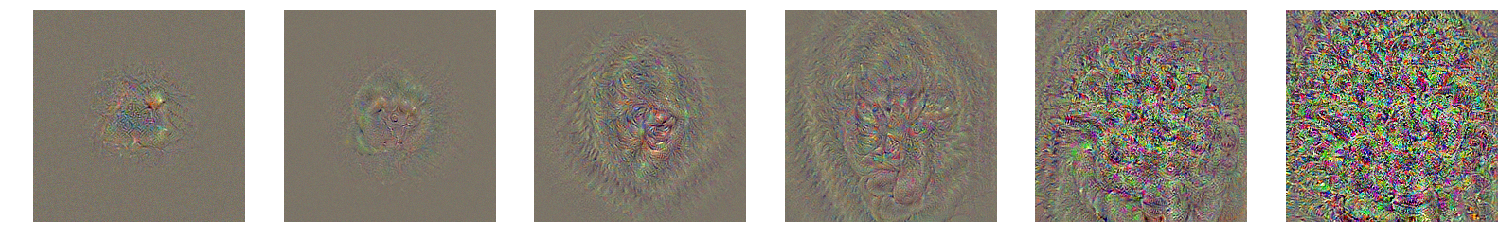

In [13]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [14]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [15]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer2"

In [16]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [17]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.0.add_func/other-images00000000.npy
(128, 3, 83, 83)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.1.add_func/other-images00000000.npy
(128, 3, 115, 115)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.2.add_func/other-images00000000.npy
(128, 3, 147, 147)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.3.add_func/other-images00000000.npy
(128, 3, 179, 179)


In [18]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [19]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer1"

In [20]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [21]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.0.add_func/other-images00000000.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.1.add_func/other-images00000000.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.2.add_func/other-images00000000.npy
(64, 3, 59, 59)


In [22]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [23]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer4"

In [24]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [25]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.0.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.1.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.2.add_func/other-images00000000.npy
(512, 3, 224, 224)


In [26]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [27]:
root = "/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/"
key_arch = "resnet34-skip4"
key_layer = "layer4"

In [28]:
out_dir = os.path.join("20210106_adam", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [29]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.0.add_func/neuron-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.1.add_func/neuron-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.2.add_func/neuron-images00000000.npy
(512, 3, 224, 224)


In [30]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)